In [ ]:
import pandas as pd
import numpy as np
import datetime

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/Pump_degradation/pump_degradation.plk')
# df = df.iloc[:10000]

In [ ]:
len_0 = len(df[df['breaks_after_action']==0])
len_1 = len(df[df['breaks_after_action']==1])

print(len_1/len(df))

0.07212398172064376


In [ ]:
X = df.drop(['ImpellerWearFailure_after', 'ThrustBearingOverheat_after',	'RadialBearingOverheat_after',	'PumpOilOverheat_after', 'breaks_after_action'], axis=1)
y = df['breaks_after_action']

In [ ]:
# df.drop(['ImpellerWearFailure_after', 'ThrustBearingOverheat_after',	'RadialBearingOverheat_after',	'PumpOilOverheat_after', 'breaks_after_action'], axis=1)

In [ ]:
min_features_to_select = 2  # Minimum number of features to consider
lr = RandomForestClassifier(20, max_depth=20, random_state=42)

rfecv = RFECV(
    estimator=lr,
    step=1,
    cv=5,
    scoring="f1",
    min_features_to_select=min_features_to_select,
    n_jobs=-1,
)
rfecv.fit(X, y)

RFECV(cv=5,
      estimator=RandomForestClassifier(max_depth=20, n_estimators=20,
                                       random_state=42),
      min_features_to_select=2, n_jobs=-1, scoring='f1')

In [ ]:
print("Optimal number of features: %d" % rfecv.n_features_)
print("Selected features: %s" % list(X.columns[rfecv.support_]))

print(rfecv.ranking_)

Optimal number of features: 19
Selected features: ['w', 'Q', 'Tt', 'Tr', 'To', 'A', 'rThrust', 'rRadial', 'wA', 'wThrust', 'wRadial', 'QLeak', 'temp', 'V', 'duration', 'ImpellerWearFailure', 'ThrustBearingOverheat', 'RadialBearingOverheat', 'PumpOilOverheat']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


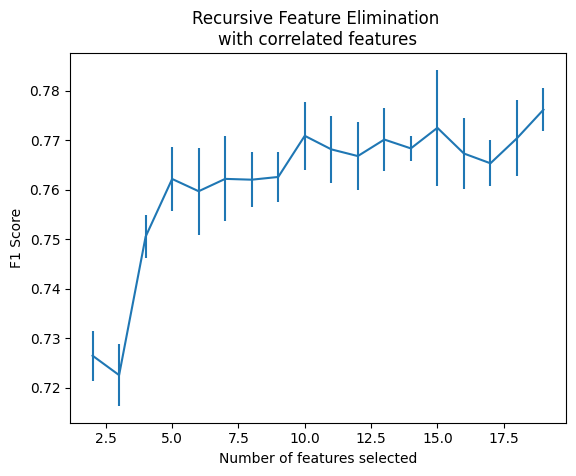

In [ ]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("F1 Score")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()